# Korrelationsanalyse

Greift einige (für euch) interessante Korrelationen heraus, die eurer Meinung nach auf interessante Zusammenhänge hindeuten könnten ("Personen die so sind ... sind oft auch so/ ... sind oft nicht so"). Stellt einige dieser von euch ausgewählten Feature-Paare auch noch einmal graphisch dar (z.B. über einen Scatter-Plot).


Korrelationen:
- [] Streitlustigkeit + Sportlichkeit
- [] Alter + HSD_Position
- [] Prokrastination + Selbsteinsch_Verwirrung
- [] Prokrastination + Abgaben
- [] Bildende Künste + Sportlichkeit (-)

zusätzl. Darstellen:
- [] Künste miteinander + Geschlecht
- [] Technologie + Studienzufriedenheit
- [] Sprachnachrichten + Alter (-)

TODO:
- Kommentieren
- Korrelationen darstellen (s.u.)

In [94]:
import numpy as np
import pandas as pd 
import seaborn as sb  
import matplotlib.pyplot as plt 

In [95]:
file_name = "./data/survery_data_annonymized_230626_clean.csv"
data = pd.read_csv(file_name)

## Korrelationsmatrix

<AxesSubplot:title={'center':'Korrelationsmatrix'}>

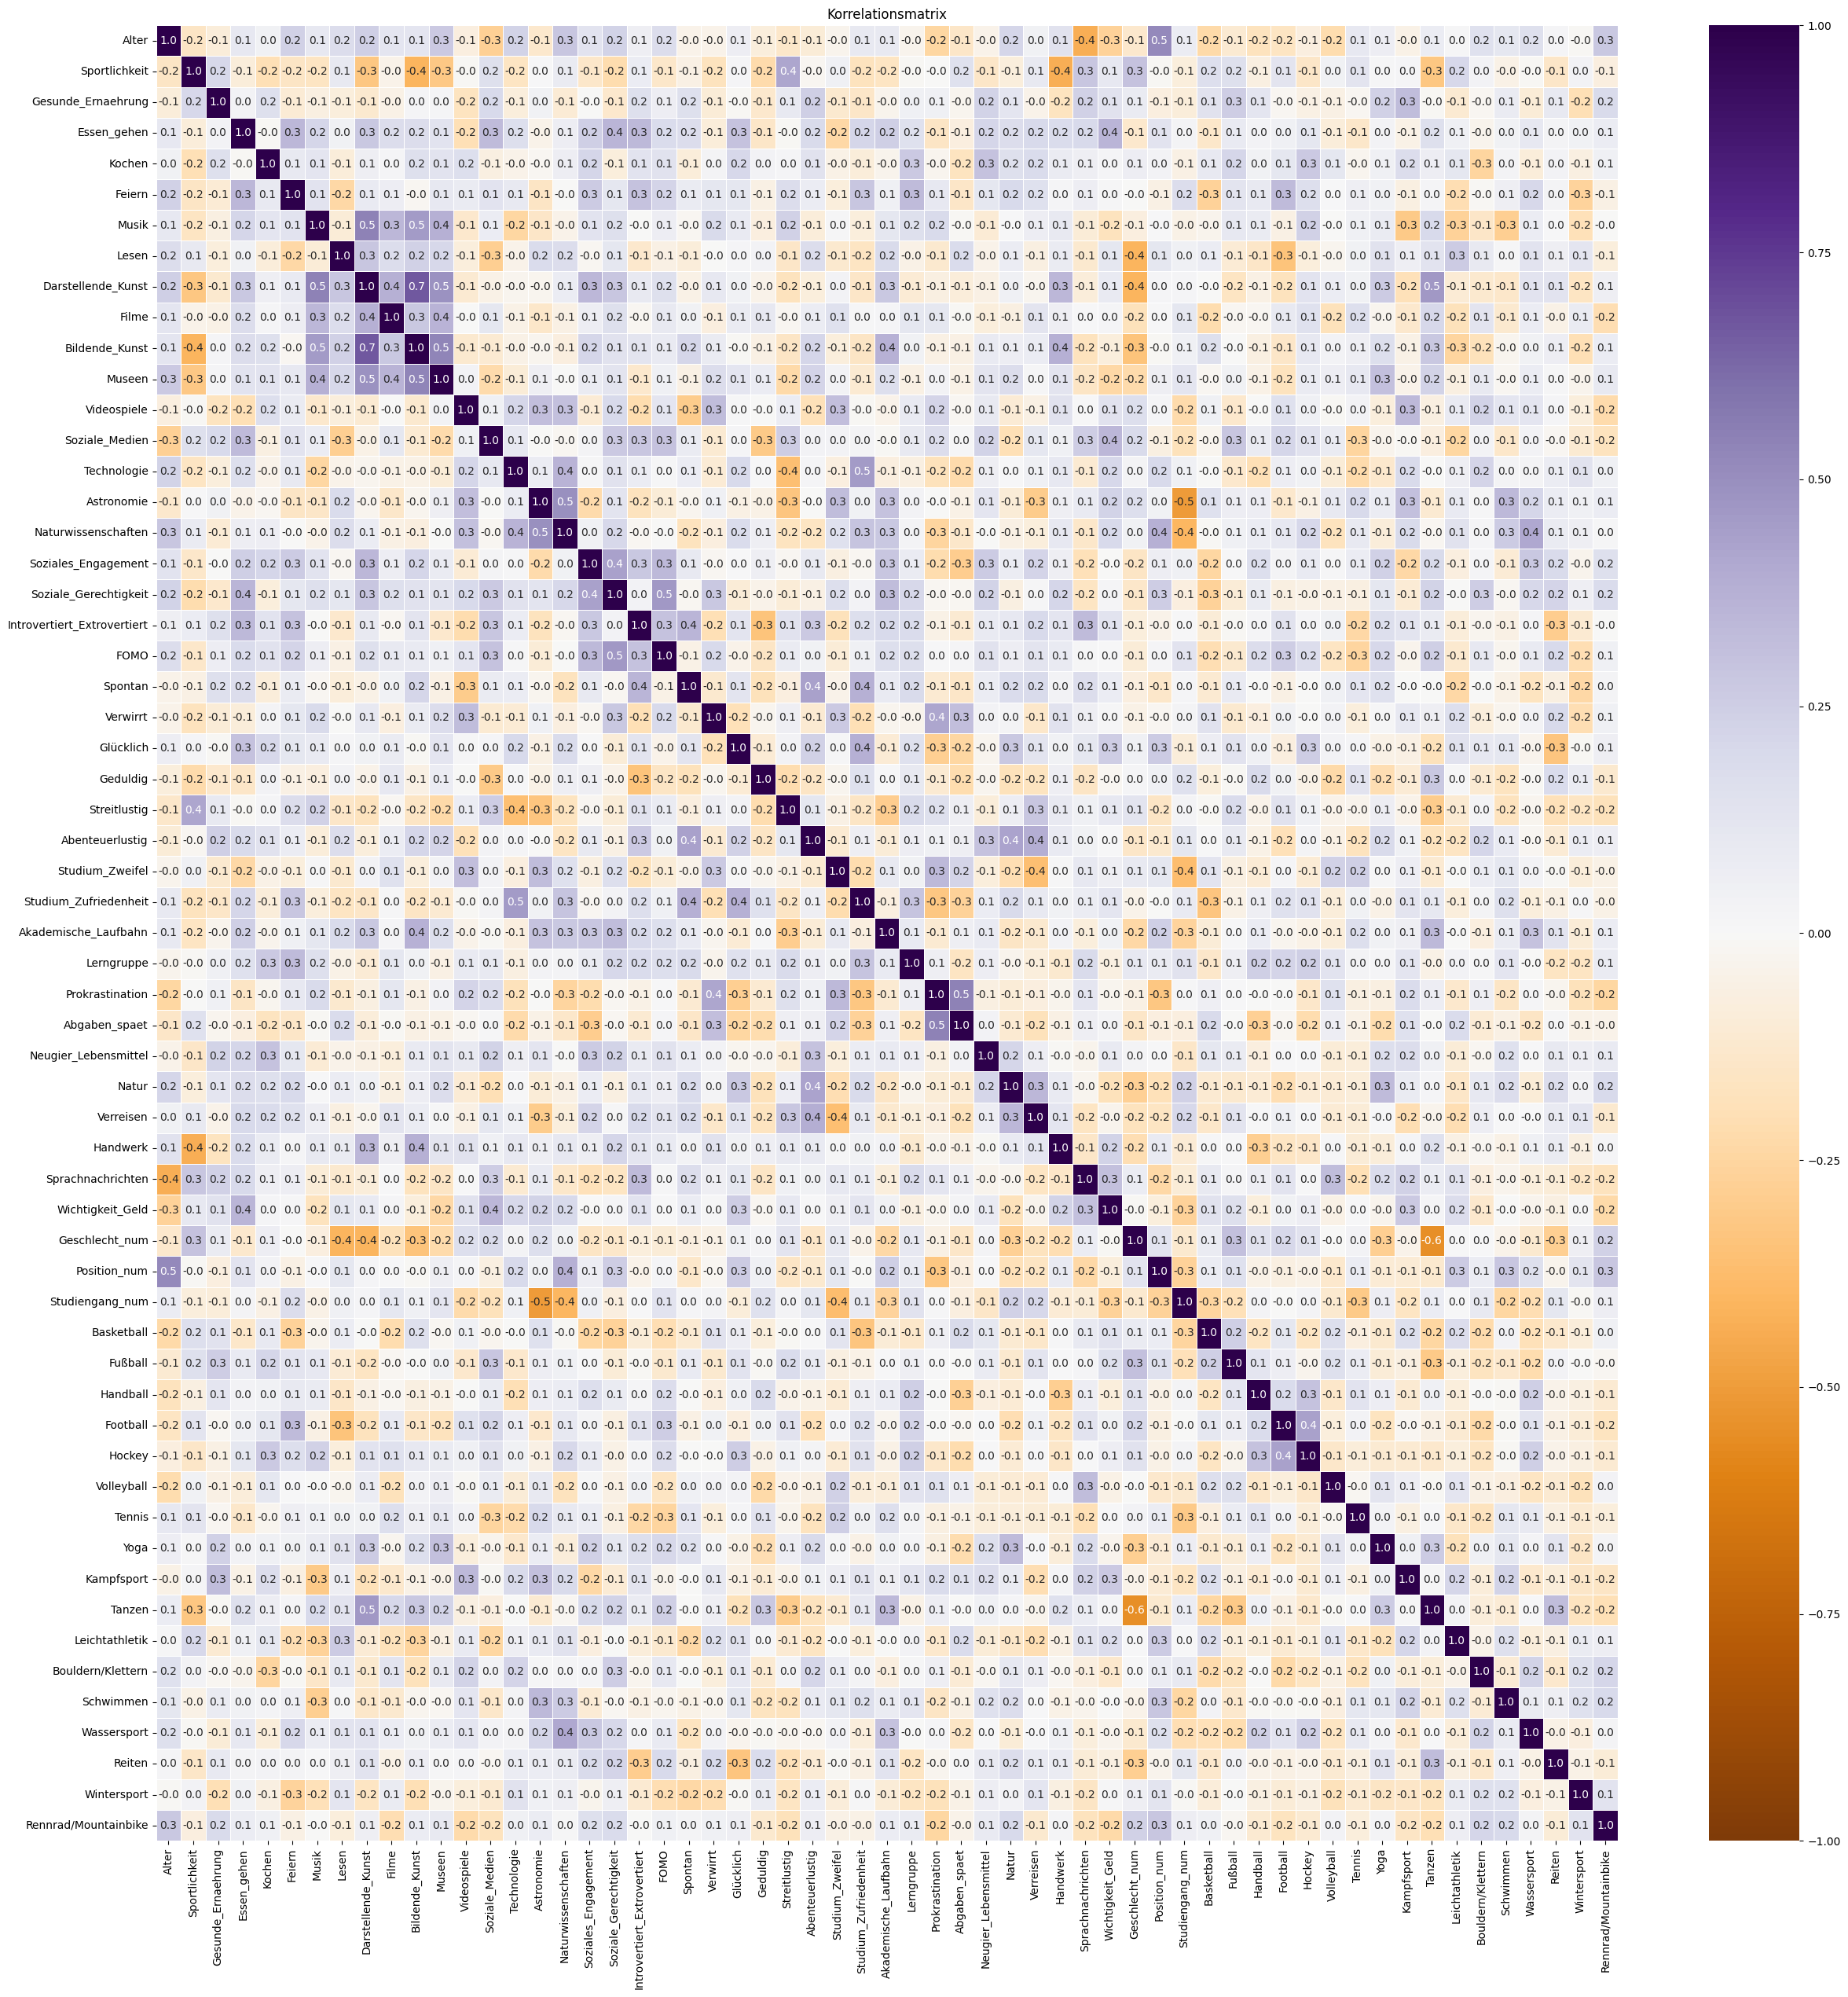

In [96]:
fig, ax = plt.subplots(figsize=(30, 30))
plt.title('Korrelationsmatrix')
correlation_matrix = data.corr()
sb.heatmap(correlation_matrix, ax=ax, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="PuOr", linewidth=0.5)

### Filterung

<AxesSubplot:title={'center':'Korrelationsmatrix (gefiltert)'}>

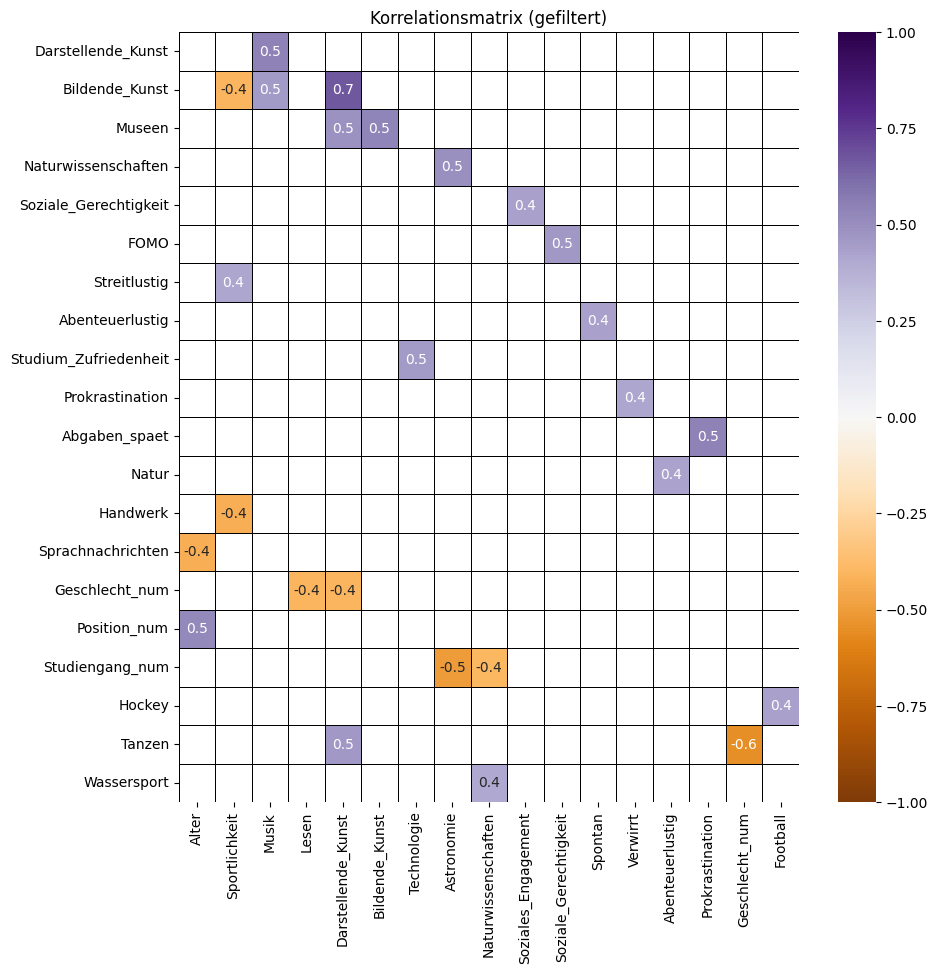

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Korrelationsmatrix (gefiltert)')

lower_tri = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
# keep only values under -0.4 and over 0.4
filtered_corr_matrix = correlation_matrix[(lower_tri <= -0.4) | (lower_tri >= 0.4)]
# remove all nan columns
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=0, how='all')
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=1, how='all')

sb.heatmap(filtered_corr_matrix, ax=ax, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="PuOr", linewidth=0.5, linecolor="black")

## Ranking
Ranking der stärksten positiven und negativen Korrelationen.

In [6]:
# Nur die Tupel heraussuchen, die hohe Korrelation haben
# Extract correlations over 0.4 
condition = (filtered_corr_matrix > 0.4)
row_indices, col_indices = np.where(condition)
corr_dict = {}

# Access the corresponding rows and columns
for row_idx, col_idx in zip(row_indices, col_indices):
    row_name = filtered_corr_matrix.index[row_idx]
    col_name = filtered_corr_matrix.columns[col_idx]
    corr_dict[row_name + ' und ' + col_name] = filtered_corr_matrix.iloc[row_idx, col_idx]

sorted_corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1], reverse=True))
for i, key in enumerate(sorted_corr_dict):
    print(str(i+1) + '. ' + key + ': ' + str(sorted_corr_dict[key]))

1. Bildende_Kunst und Darstellende_Kunst: 0.6651297916995409
2. Abgaben_spaet und Prokrastination: 0.5452593420939706
3. Darstellende_Kunst und Musik: 0.5414742211588621
4. Museen und Bildende_Kunst: 0.5373993635581167
5. Position_num und Alter: 0.5230013795908686
6. Naturwissenschaften und Astronomie: 0.4983895364226694
7. Museen und Darstellende_Kunst: 0.48792997665078114
8. Tanzen und Darstellende_Kunst: 0.4644834969915345
9. FOMO und Soziale_Gerechtigkeit: 0.4631551376095586
10. Bildende_Kunst und Musik: 0.46071639527477354
11. Studium_Zufriedenheit und Technologie: 0.45762978662362097
12. Abenteuerlustig und Spontan: 0.4347409628003631
13. Hockey und Football: 0.4346599176528584
14. Soziale_Gerechtigkeit und Soziales_Engagement: 0.43030127569096166
15. Natur und Abenteuerlustig: 0.42701478564293366
16. Streitlustig und Sportlichkeit: 0.42151957725029965
17. Prokrastination und Verwirrt: 0.4188753220353485
18. Wassersport und Naturwissenschaften: 0.41220440454368285


In [7]:
# Nur die Tupel heraussuchen, die niedrige Korrelation haben
# Extract correlations under -0.4 
condition = (filtered_corr_matrix < -0.4)
row_indices, col_indices = np.where(condition)
corr_dict = {}

# Access the corresponding rows and columns
for row_idx, col_idx in zip(row_indices, col_indices):
    row_name = filtered_corr_matrix.index[row_idx]
    col_name = filtered_corr_matrix.columns[col_idx]
    corr_dict[row_name + ' und ' + col_name] = filtered_corr_matrix.iloc[row_idx, col_idx]

sorted_corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1]))
for i, key in enumerate(sorted_corr_dict):
    print(str(i+1) + '. ' + key + ': ' + str(sorted_corr_dict[key]))

1. Tanzen und Geschlecht_num: -0.5513661078227865
2. Studiengang_num und Astronomie: -0.5039354612509522
3. Sprachnachrichten und Alter: -0.43647261974361773
4. Handwerk und Sportlichkeit: -0.4335630162060763
5. Bildende_Kunst und Sportlichkeit: -0.4139553899669205
6. Geschlecht_num und Darstellende_Kunst: -0.41153839343895204
7. Geschlecht_num und Lesen: -0.4069782547999729
8. Studiengang_num und Naturwissenschaften: -0.40012349757817944


## Einordnung
### Aufteilung nach Thema
|   | Kreatives und Geschlecht                                           |   | Kreatives und Sport                                    |   | Studium und Science                                           |
|---|--------------------------------------------------------------------|---|--------------------------------------------------------|---|---------------------------------------------------------------|           
| 1 | Bildende_Kunst und Darstellende_Kunst: 0.6651297916995409          | 1 | Bildende_Kunst und Sportlichkeit: -0.4139553899669205  | 1 | Studium_Zufriedenheit und Technologie: 0.45762978662362097    |  
| 2 | Darstellende_Kunst und Musik: 0.5414742211588621                   | 2 | Handwerk und Sportlichkeit: -0.4335630162060763        | 2 | Studiengang_num und Astronomie: -0.5039354612509522           |  
| 3 | Museen und Bildende_Kunst: 0.5373993635581167                      | 3 | Streitlustig und Sportlichkeit: 0.42151957725029965    | 3 | Studiengang_num und Naturwissenschaften: -0.40012349757817944 |
| 4 | Museen und Darstellende_Kunst: 0.48792997665078114                 | 4 |                                                        | 4 |                                                               |
| 5 | Tanzen und Darstellende_Kunst: 0.4644834969915345                  | 5 |                                                        | 5 |                                                               |
| 6 | Bildende_Kunst und Musik: 0.46071639527477354                      | 6 |                                                        | 6 |                                                               |
| 7 | Geschlecht_num und Lesen: -0.4069782547999729                      | 7 |                                                        | 7 |                                                               |
| 8 | Geschlecht_num und Darstellende_Kunst: -0.41153839343895204        | 8 |                                                        | 8 |                                                               |
| 9 | Tanzen und Geschlecht_num: -0.5513661078227865                     | 9 |                                                        | 9 |                                                               |
|   |                                                                    |   |                                                        |   |                                                               |
|   | **Sport und Science**                                              |   | **Position an der HSD und Alter**                      |   | **Kommunikation und Alter**                                   | 
| 1 | Wassersport und Naturwissenschaften: 0.41220440454368285           | 1 | Position_num und Alter: 0.5230013795908686             | 1 | Sprachnachrichten und Alter: -0.43647261974361773             |
|   |                                                                    |   |                                                        |   |                                                               |
|   | **Soziales**                                                       |   | **Zu ähnlich/kaum aussagekräftig**                     |   |
| 1 | FOMO und Soziale_Gerechtigkeit: 0.4631551376095586                 | 1 | Abgaben_spaet und Prokrastination: 0.5452593420939706  |   |
| 2 | Soziale_Gerechtigkeit und Soziales_Engagement: 0.43030127569096166 | 2 | Prokrastination und Verwirrt: 0.4188753220353485       |   |
| 3 |                                                                    | 3 | Hockey und Football: 0.4346599176528584                |   |
| 4 |                                                                    | 4 | Naturwissenschaften und Astronomie: 0.4983895364226694 |   |
| 5 |                                                                    | 5 | Abenteuerlustig und Spontan: 0.4347409628003631        |   |
| 6 |                                                                    | 6 | Natur und Abenteuerlustig: 0.42701478564293366         |   |

### Anstellen von Hypothesen
- Kreatives und Geschlecht
    - Personen die sich als weiblich einordnen haben eher kreative Interessen
- Kreatives und Sport
    - Personen die kreative Interessen haben sind eher unsportlich
    - Personen die sich als sportlich einordnen sind eher Streitlustig
    - -> Sind dann Personen die sich als sportlich einordnen eher männlich?
- Studium und Science
    - Personen sind eher mit ihrem Studiengang im FB Medien zufrieden, wenn sie Technologie interessiert sind
    - Die stärksten Astronomie und Naturwissenschaft Interessierten sind aus BMI
- ...

### Kreative Interessen und Geschlecht

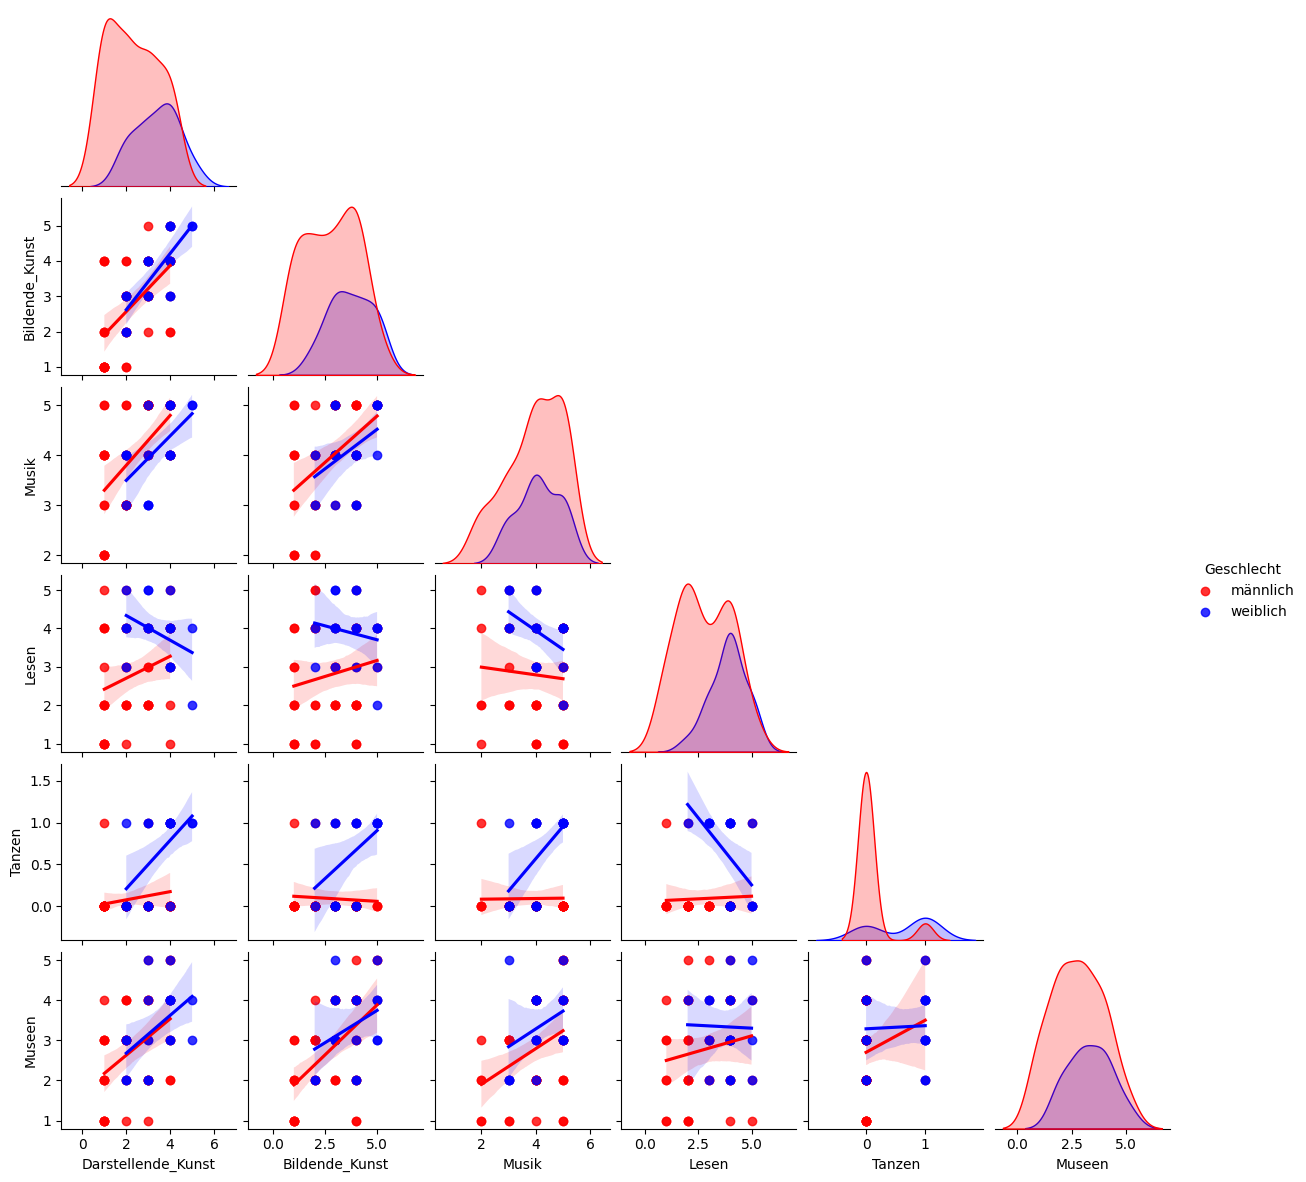

In [22]:
interessen = ['Darstellende_Kunst', 'Bildende_Kunst', 'Musik', 'Lesen', 'Tanzen', 'Museen']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=interessen, palette=["red", "blue"], corner=True
)

<AxesSubplot:xlabel='Bildende_Kunst', ylabel='Darstellende_Kunst'>

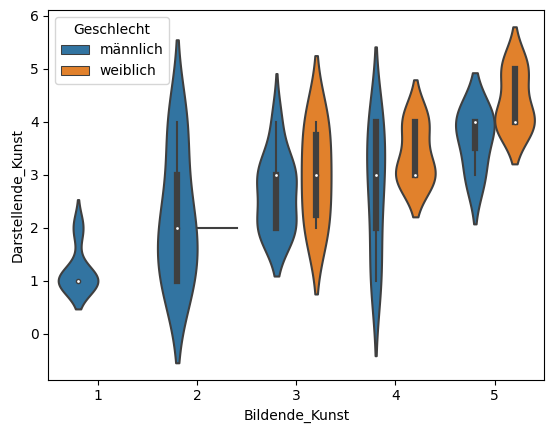

In [97]:
sb.violinplot(data=data, x="Bildende_Kunst", y="Darstellende_Kunst", hue="Geschlecht")

<AxesSubplot:xlabel='Bildende_Kunst', ylabel='Darstellende_Kunst'>

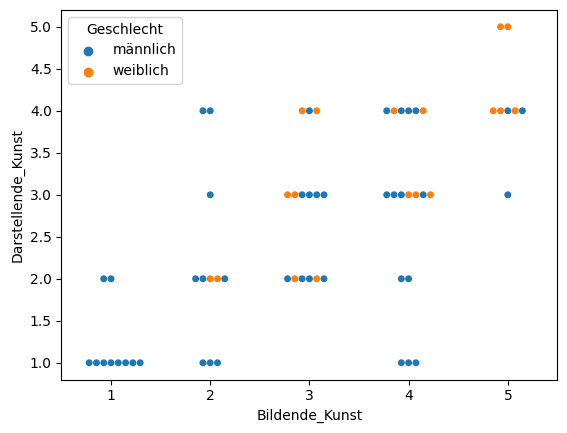

In [72]:
sb.swarmplot(data=data, x="Bildende_Kunst", y="Darstellende_Kunst", hue="Geschlecht")

### Kreatives und Sport

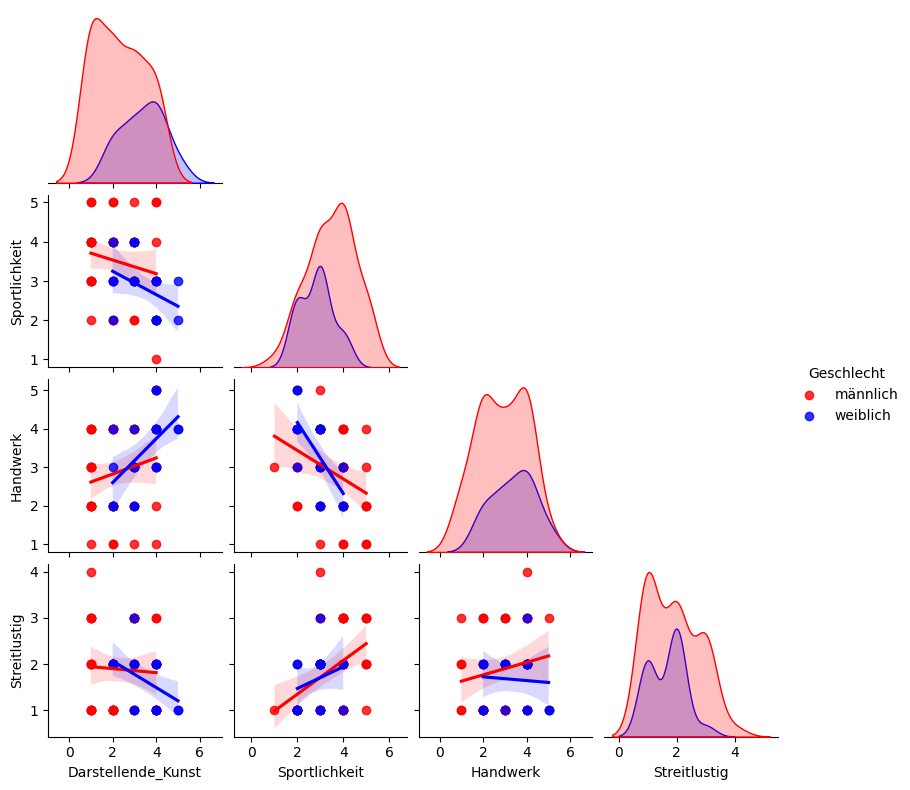

In [101]:
interessen = ['Darstellende_Kunst', 'Sportlichkeit', 'Handwerk', 'Streitlustig']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=interessen, palette=["red", "blue"], corner=True
)

### Studium und Science

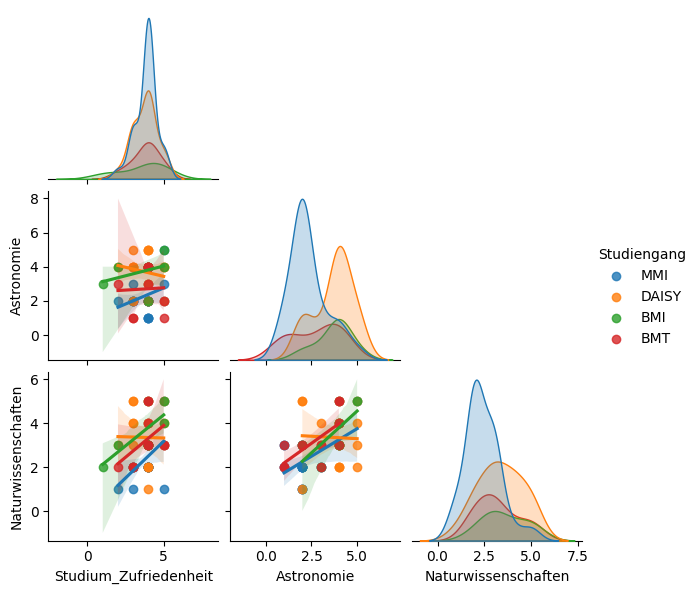

In [104]:
interessen = ['Studium_Zufriedenheit', 'Astronomie', 'Naturwissenschaften']
sb.pairplot(
      data, hue='Studiengang', kind='reg', height=2, 
      vars=interessen, corner=True
)

<AxesSubplot:xlabel='Technologie', ylabel='Studium_Zufriedenheit'>

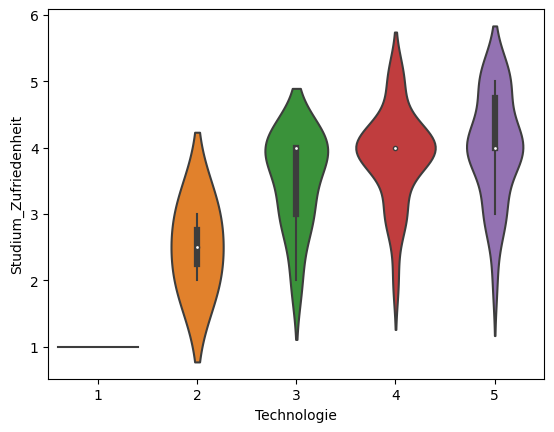

In [122]:
sb.violinplot(data=data, x="Technologie", y="Studium_Zufriedenheit")

<AxesSubplot:xlabel='Astronomie', ylabel='Studiengang'>

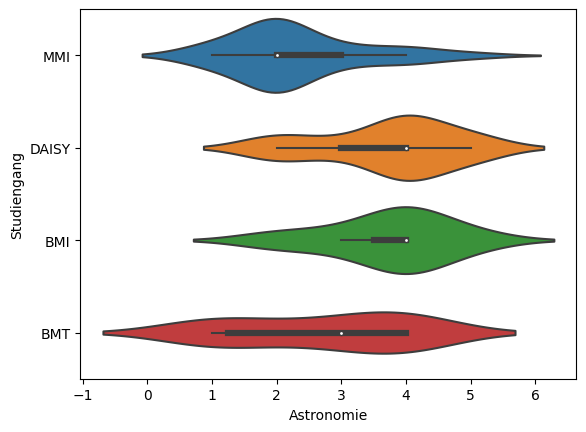

In [117]:
sb.violinplot(data=data, x="Astronomie", y="Studiengang")

### Position an der HSD und Alter
- Position
    - 0 = Student\*in
    - 1 = Wissenschaftliche\*r Mitarbeiter\*in
    - 2 = Dozent\*in

<AxesSubplot:xlabel='Position_num', ylabel='Alter'>

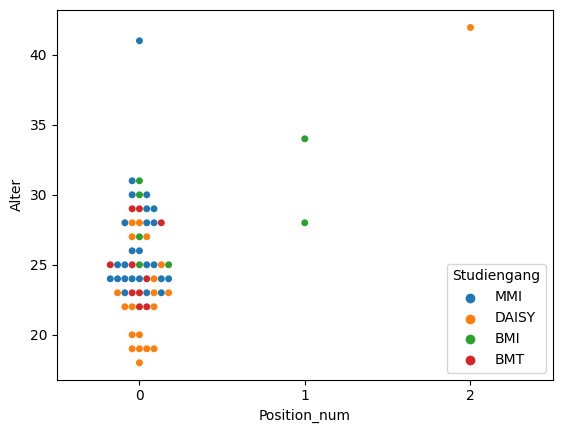

In [108]:
sb.swarmplot(data=data, x="Position_num", y="Alter", hue="Studiengang")

### Sport und Science

<AxesSubplot:xlabel='Wassersport', ylabel='Naturwissenschaften'>

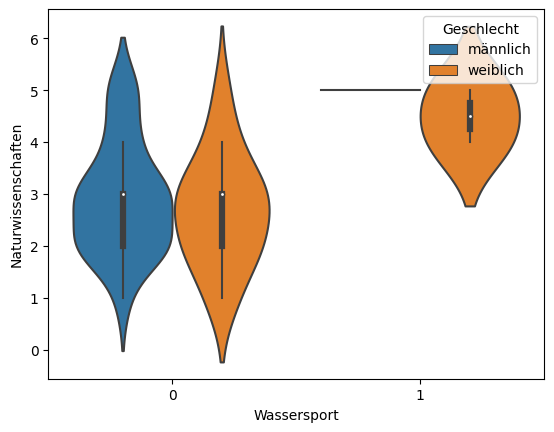

In [109]:
sb.violinplot(data=data, x="Wassersport", y="Naturwissenschaften", hue="Geschlecht")

### Kommunikation und Alter

<AxesSubplot:xlabel='Sprachnachrichten', ylabel='Alter'>

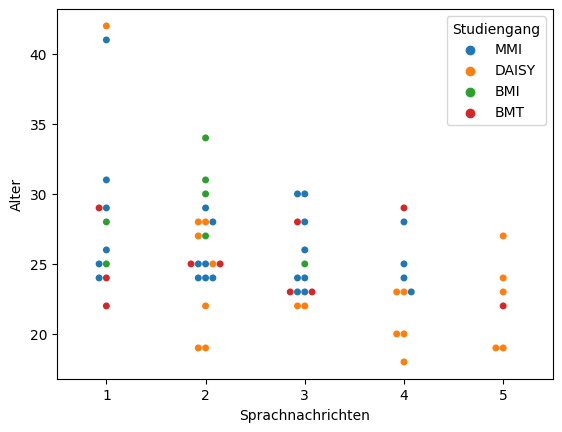

In [111]:
sb.swarmplot(data=data, x="Sprachnachrichten", y="Alter", hue="Studiengang")

<AxesSubplot:xlabel='Studiengang', ylabel='Alter'>

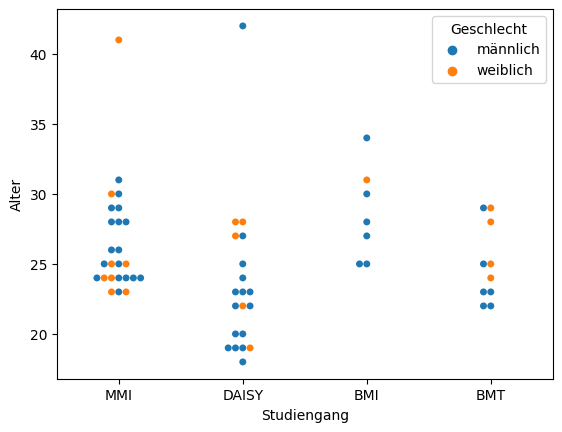

In [112]:
sb.swarmplot(data=data, x="Studiengang", y="Alter", hue="Geschlecht")

### Soziales

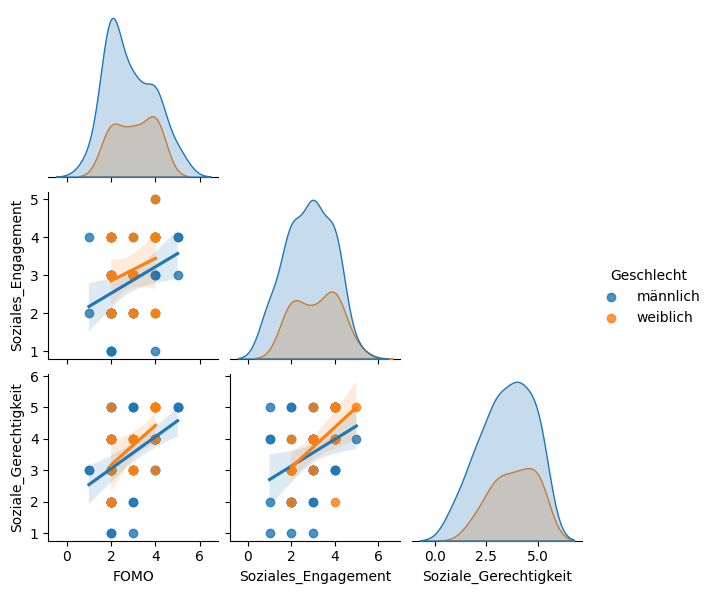

In [129]:
interessen = ['FOMO', 'Soziales_Engagement', 'Soziale_Gerechtigkeit']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=interessen, corner=True
)

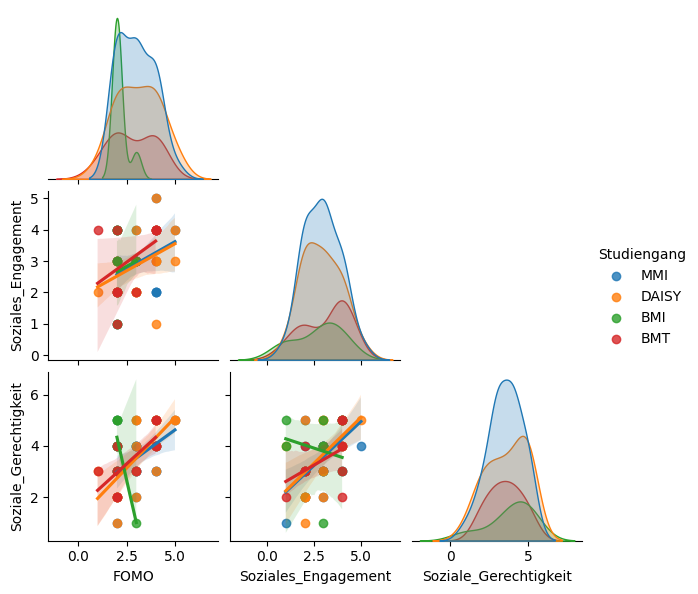

In [132]:
interessen = ['FOMO', 'Soziales_Engagement', 'Soziale_Gerechtigkeit']
sb.pairplot(
      data, hue='Studiengang', kind='reg', height=2, 
      vars=interessen, corner=True
)

### Prokrastination

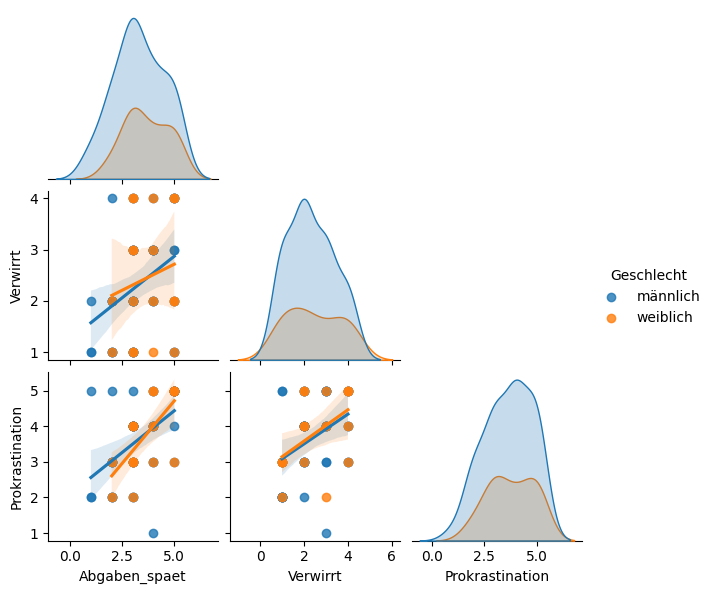

In [130]:
interessen = ['Abgaben_spaet', 'Verwirrt', 'Prokrastination']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=interessen, corner=True
)

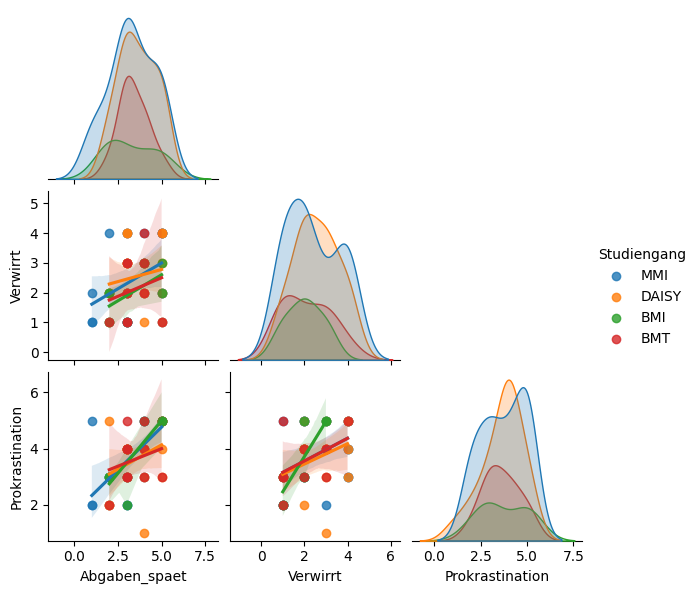

In [131]:
interessen = ['Abgaben_spaet', 'Verwirrt', 'Prokrastination']
sb.pairplot(
      data, hue='Studiengang', kind='reg', height=2, 
      vars=interessen, corner=True
)